In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

In [3]:
results = pd.read_csv('BC_final_results.csv', index_col=0)
ms_results = pd.read_csv('BC_MS_results.csv', index_col=0)
sample_info = pd.read_csv('BC_sample_info.csv', index_col=0)

In [4]:
df = pd.read_table('data/Layer2_BC_count_matrix-1.tsv', index_col=0)
df = df.loc[sample_info.index]
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes

dfm = np.log10(df + 1)

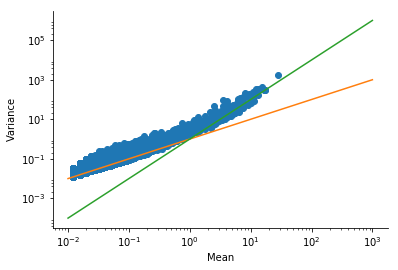

In [5]:
figsize(6, 4)
plt.loglog()
plt.scatter(df.mean(), df.var());
xy = [1e-2, 1e3]
plt.plot(xy, xy, c='C1');
plt.plot(xy, np.square(xy), c='C2');
plt.xlabel('Mean')
plt.ylabel('Variance');

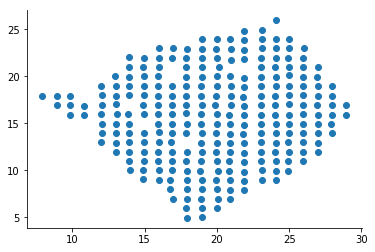

In [6]:
plt.scatter(sample_info.x, sample_info.y);

In [7]:
results.model.value_counts()

SE    12857
Name: model, dtype: int64

In [8]:
results['pval'] = results['pval'].clip_lower(results.query('pval > 0')['pval'].min() / 2)
results['qval'] = results['qval'].clip_lower(results.query('qval > 0')['qval'].min() / 2)
ms_results['pval'] = ms_results['pval'].clip_lower(ms_results.query('pval > 0')['pval'].min() / 2)
ms_results['qval'] = ms_results['qval'].clip_lower(ms_results.query('qval > 0')['qval'].min() / 2)

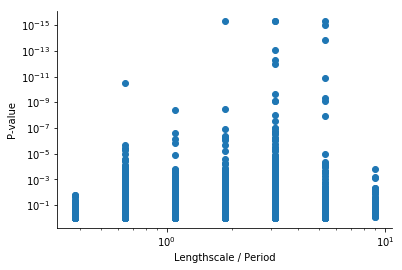

In [9]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

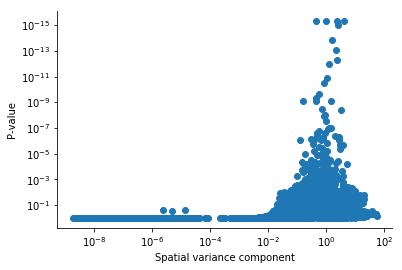

In [10]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

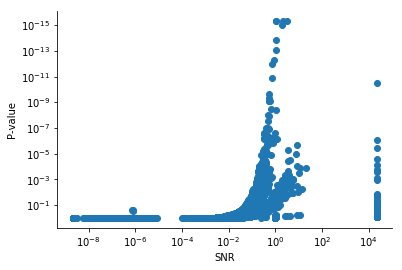

In [11]:
plt.loglog()
plt.scatter(1. / results.max_delta, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('P-value');

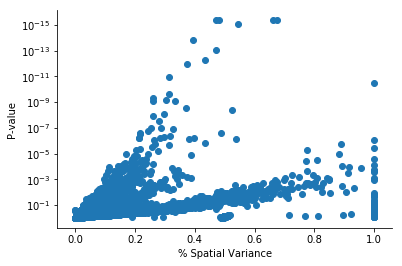

In [12]:
# plt.loglog()
plt.yscale('log')
plt.scatter(results.FSV, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('% Spatial Variance')
plt.ylabel('P-value');

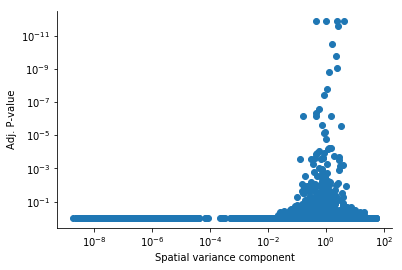

In [13]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Adj. P-value');

In [14]:
import SpatialDE.plot

In [15]:
results.head()

,FSV,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,s2_FSV,s2_logdelta,time,BIC,max_ll_null,LLR,pval,qval
0,2.060155e-09,4,LANCL2,0.378583,4.851652e+08,-130.386732,-1.649842,5.952907e-09,SE,250,0.554773,9.464345e+16,0.000846,282.859309,-130.387735,0.001003,0.974739,0.974739
1,2.060155e-09,4,TMEM109,0.378583,4.851652e+08,-265.715929,-3.069552,2.043167e-08,SE,250,5.481547,9.351445e+17,0.000542,553.517701,-265.716931,0.001003,0.974739,0.974739
2,5.021805e-01,4,TMEM189,0.378583,9.908357e-01,-216.197143,-2.730291,3.697555e+00,SE,250,39.285678,7.358733e+02,0.000539,454.480130,-216.302453,0.105309,0.745549,0.974739
3,9.999546e-01,4,ITPK1,0.378583,4.539993e-05,-226.594291,-3.862725,1.368906e+01,SE,250,1.437719,5.047079e+08,0.000831,475.274426,-227.782300,1.188009,0.275732,0.974739
4,9.999546e-01,4,UBXN11,0.378583,4.539993e-05,-230.743820,-2.281951,5.023700e+00,SE,250,14.510042,5.093718e+09,0.000539,483.573483,-231.220691,0.476871,0.489843,0.974739


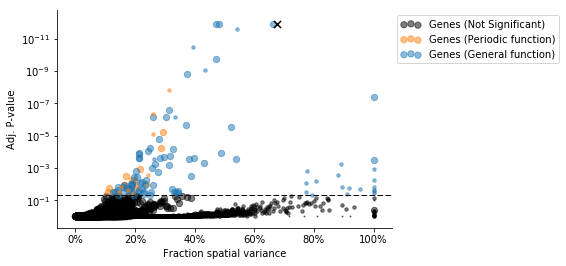

In [16]:
SpatialDE.plot.FSV_sig(results, ms_results)

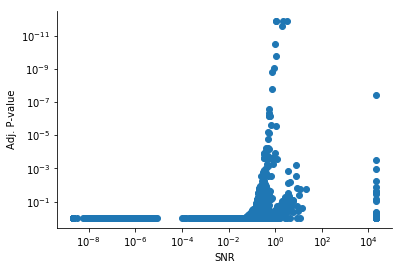

In [17]:
plt.loglog()
plt.scatter(1./ results.max_delta, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('SNR')
plt.ylabel('Adj. P-value');

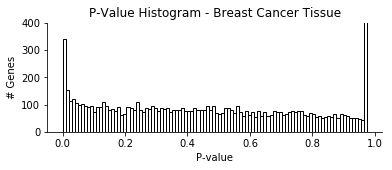

In [18]:
figsize(6, 2)
plt.hist(results.query('pval < 1.')['pval'], bins=100, color='w', ec='k');
plt.title('P-Value Histogram - Breast Cancer Tissue')
plt.ylabel('# Genes')
plt.xlabel('P-value');
plt.ylim(ymax=400)

plt.savefig('BC-pvalue-hist.pdf')

In [19]:
ms_results.model.value_counts()

SE     94
PER    22
Name: model, dtype: int64

In [20]:
results.query('qval < 0.05').shape

(116, 18)

In [21]:
import gprofiler

In [22]:
GO_result = gprofiler.gprofiler(results.query('qval < 0.05')['g'].sort_values(), ordered_query=True)

DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): biit.cs.ut.ee
DEBUG:requests.packages.urllib3.connectionpool:http://biit.cs.ut.ee:80 "POST /gprofiler/gcocoa.cgi HTTP/1.1" 200 None


In [23]:
GO_result.loc['GO:0098644'].intersection

'COL11A1,COL1A1,COL5A1,COL1A2,COL3A1,COL5A2'

In [24]:
GO_result.sort_values('p.value')[['p.value', 'domain', 'term.name', 'overlap.size']].head(20)

,p.value,domain,term.name,overlap.size
term.id,,,,
GO:0030198,1.280000e-33,BP,extracellular matrix organization,36
GO:0043062,1.430000e-33,BP,extracellular structure organization,36
GO:0005615,3.110000e-28,CC,extracellular space,56
GO:0031012,1.790000e-25,CC,extracellular matrix,36
GO:0044421,1.910000e-24,CC,extracellular region part,77
GO:0005578,3.450000e-23,CC,proteinaceous extracellular matrix,30
GO:0030574,6.360000e-22,BP,collagen catabolic process,16
GO:0005576,1.100000e-21,CC,extracellular region,80
REAC:1474244,1.280000e-21,rea,Extracellular matrix organization,28


In [25]:
GO_result.sort_values('p.value').to_csv('BC_gProfiler.csv')

Plot examples of SV Genes from different function classes

In [33]:
N = 5
top_per_ls = ms_results \
                  .query('g != "log_total_count"') \
                  .sort_values('qval', ascending=True) \
                  .groupby(['model','l']) \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls

,BIC,FSV,LLR,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,s2_FSV,s2_logdelta,time,pval,qval,max_ll_null
30,-201.345464,0.999954,44.047156,4,SNAP25,0.641736,0.000045,111.715654,-1.371608,0.838175,SE,250,0.000500,1.735622e+05,0.000530,3.205591e-11,3.746753e-08,67.668498
26,393.039941,0.889762,22.683446,4,HMGCS2,0.641736,0.123198,-185.477049,-2.956878,3.822974,SE,250,0.008679,7.997883e-01,0.001287,1.910063e-06,5.989679e-04,-208.160495
28,-170.261361,0.999954,21.317264,4,SSPO,0.641736,0.000045,96.173602,-1.264158,0.720140,SE,250,0.004697,1.631808e+06,0.000650,3.892104e-06,1.137291e-03,74.856338
38,-155.204362,0.776055,20.675405,4,ZNF880,0.641736,0.286942,88.645103,-1.390751,0.760450,SE,250,0.003465,1.173776e-01,0.000928,5.441043e-06,1.520771e-03,67.969698
27,-50.901270,0.882192,19.315432,4,ETV7,0.641736,0.132787,36.493557,-1.470111,0.920321,SE,250,0.013310,1.105050e+00,0.001091,1.108071e-05,2.849295e-03,17.178124
45,640.138701,0.522985,34.724042,4,TGM2,1.087806,0.892182,-309.026429,-4.468248,3.333690,SE,250,0.000389,7.306100e-03,0.000773,3.799107e-09,2.713618e-06,-343.750471
48,190.419249,0.487063,26.578791,4,CXCL13,1.087806,1.030126,-84.166703,-1.707101,0.479013,SE,250,0.000412,7.724430e-03,0.000669,2.530060e-07,1.230533e-04,-110.745493
49,-230.943314,0.538366,24.531208,4,IL12RB1,1.087806,0.838747,126.514579,-1.397142,0.298391,SE,250,0.000568,1.073141e-02,0.000848,7.311595e-07,2.685862e-04,101.983371
44,430.881327,0.433192,23.091364,4,CXCL9,1.087806,1.279875,-204.397742,-2.651375,1.106132,SE,250,0.000373,7.181313e-03,0.000718,1.544830e-06,5.092789e-04,-227.489106
47,383.815189,0.388127,19.163421,4,FGG,1.087806,1.542051,-180.864673,-1.971915,0.617966,SE,250,0.000594,1.206444e-02,0.000848,1.199909e-05,2.966774e-03,-200.028093


In [34]:
top_per_ls.shape

(37, 18)

In [35]:
model_colors = {'SE': 'C0', 'PER': 'C1'}

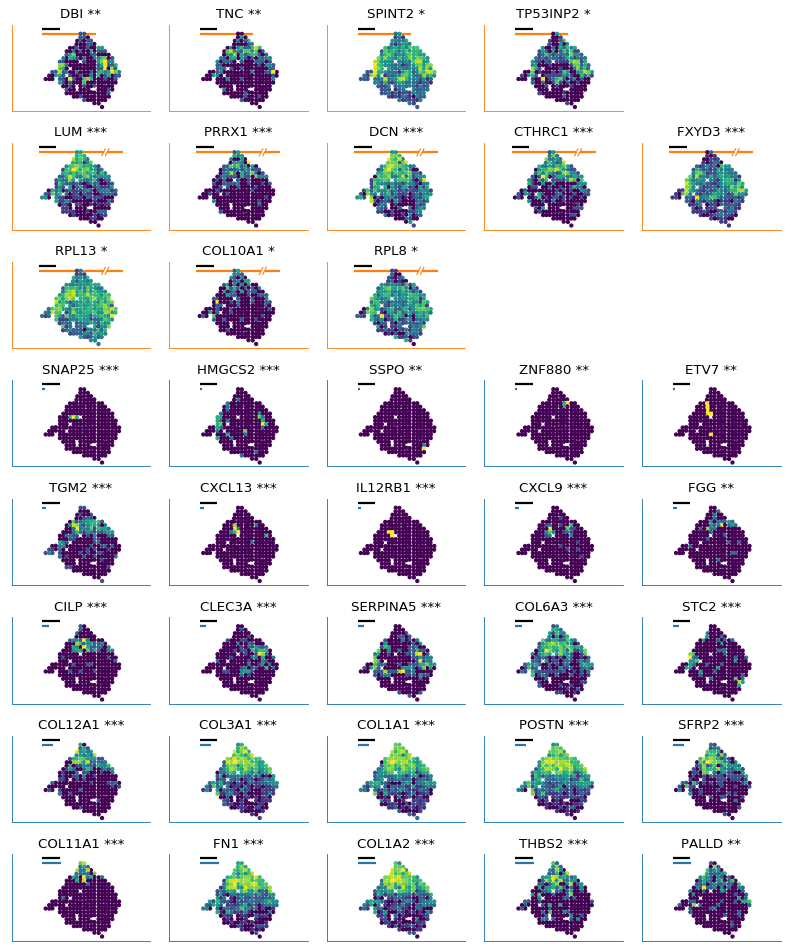

In [36]:
plt.figure(figsize=(10, 12), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby(['model', 'l'])):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        ax = plt.subplot(N_rows, N, j * N + i + 1)

        plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=8);
        
        s = ' *'
        if r['qval'] < 0.01:
            s = ' **'

        if r['qval'] < 0.001:
            s = ' ***'

        plt.title(r['g'] + s)

        plt.xticks([])
        plt.yticks([])
        plt.hlines(-3.5, 7, 12, lw=2)
        if r['l'] + 7 < 28:
            plt.hlines(-5, 7, 7 + r['l'], lw=2, color=model_colors[r['model']], zorder=0)
            
        else:
            plt.hlines(-5, 7, 25.5, lw=2, color=model_colors[r['model']], zorder=0)
            plt.plot([25, 26], [-6, -4], lw=1, color=model_colors[r['model']])
            plt.plot([26, 27], [-6, -4], lw=1, color=model_colors[r['model']])
            plt.hlines(-5, 26.5, 31, lw=2, color=model_colors[r['model']])
            
        for spine in ax.spines.values():
            spine.set_edgecolor(model_colors[r['model']])
            
        plt.axis('equal')

plt.tight_layout()
plt.savefig('top_BC_genes_per_ls.pdf')

In [37]:
# Size of scale bar (black) in µm
5 * 200

1000

Comparison with genes highlighted in Stahl et al

In [38]:
stahl_genes = ["IGFBP5", "SPARC", "VIM", "FN1", "POSTN", "MUCL1", "PIP", "SCGB2A2", \
                         "GAS6", "KRT17", "PEG10", "AREG", "MNP14", "DCN"]

In [39]:
len(stahl_genes)

14

In [40]:
results.query('g in @stahl_genes & qval < 0.05').shape

(7, 18)

In [41]:
results.query('g in @stahl_genes & qval < 0.05')

,FSV,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,s2_FSV,s2_logdelta,time,BIC,max_ll_null,LLR,pval,qval
9020,0.313578,4,IGFBP5,1.843940,2.048912,-353.813480,-6.713392,2.997148,SE,250,0.000930,0.022132,0.000783,729.712803,-376.224301,22.410822,2.201302e-06,6.738605e-04
10439,0.434656,4,POSTN,3.125663,1.085654,-350.154055,-7.397129,2.341853,SE,250,0.002670,0.051386,0.000633,722.393953,-402.311807,52.157752,5.121459e-13,8.230824e-10
10528,0.334321,4,SPARC,3.125663,1.661981,-357.978162,-5.911836,1.514209,SE,250,0.002613,0.058903,0.000765,738.042167,-395.680666,37.702504,8.239873e-10,6.621253e-07
10626,0.295808,4,DCN,3.125663,1.987033,-352.352520,-4.266460,0.931284,SE,250,0.001750,0.043921,0.000763,726.790884,-385.429557,33.077037,8.857872e-09,5.993982e-06
10893,0.191711,4,VIM,3.125663,3.519203,-348.022589,-3.750629,0.603940,SE,250,0.001913,0.078720,0.000725,718.131021,-364.359867,16.337278,5.301082e-05,1.018499e-02
11206,0.145092,4,PEG10,3.125663,4.918116,-216.669639,-3.074027,0.292211,SE,250,0.001005,0.060920,0.000828,455.425121,-229.045392,12.375753,4.349453e-04,4.862689e-02
12123,0.543718,4,FN1,5.298311,0.530862,-345.000761,-7.995903,2.534525,SE,250,0.003509,0.066529,0.000726,712.087366,-409.776575,64.775814,8.881784e-16,2.283862e-12


In [42]:
from scipy import stats

In [43]:
results.shape

(12857, 18)

In [44]:
c_table = np.array([[(114) - 7, 7], [(12856 - 114) - (14 - 7), 14 - 7]])
oddsratio, pvalue = stats.fisher_exact(c_table)
pvalue

1.1669533767780755e-11

In [45]:
c_table.sum()

12856

In [49]:
N = 2
top_per_ls = ms_results.query('g not in @stahl_genes') \
                  .query('g != "log_total_count"') \
                  .sort_values('qval', ascending=True) \
                  .groupby('l') \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])

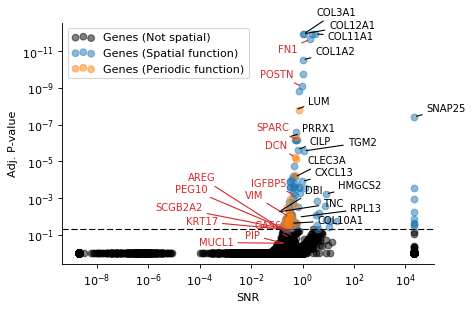

In [50]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('qval > 0.05')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Not spatial)', marker='o', color='k');

tmp = ms_results.query('model == "SE"')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Spatial function)', marker='o', color='C0');

tmp = ms_results.query('model == "PER"')
tmp = tmp.drop('max_delta', 1).merge(results[['g', 'max_delta']], on='g')
plt.scatter(1./ tmp['max_delta'], tmp['qval'],
            alpha=0.5, rasterized=True, label='Genes (Periodic function)', marker='o', color='C1');


# Annotate Stahl genes
tmp = results.query('g in @stahl_genes')

x_offsets = {'FN1': 3,
             'SCGB2A2': 2e3,
             'MUCL1': 1e2,
             'VIM': 1e1,
             'PIP': 1e1,
             'PEG10': 1e3,
             'KRT17':1e3,
             'AREG': 1e3}
y_offsets = {'MUCL1': 0.75,
             'FN1': 2e-1,
             'PEG10': 1e2,
             'VIM': 1e1,
             'SCGB2A2': 1e1,
             'AREG': 1e3,
             'KRT17': 2,
             'PIP': 2}
for i, r in tmp.iterrows():
    xy = (1./r['max_delta'], r['qval'])
    xyt = (xy[0] / x_offsets.get(r['g'], 2),
           xy[1] / y_offsets.get(r['g'], 3),)
    plt.annotate(r['g'], xy, xyt, color='tab:red', horizontalalignment='right',
                 arrowprops={'arrowstyle': '-', 'color': 'tab:red'}, size=9)
    

# Annotate top genes
x_offsets = {'COL3A1': 3,
             'COL12A1': 1e1,
             'TGM2': 5e1,
             'COL10A1':1e1,
             'RPL13': 1e2,
             'TNC': 6e1,
             'DBI': 1e1}
y_offsets = {'COL3A1': 1e1,
             'COL11A1': 5e-1,
             'CLEC3A': 5,
             'COL10A1': 1,
             'DBI': 1e1}
for i, r in top_per_ls.iterrows():
    xy = (1./r['max_delta'], r['qval'])
    xyt = (xy[0] * x_offsets.get(r['g'], 3),
           xy[1] / y_offsets.get(r['g'], 2),)
    plt.annotate(r['g'], xy, xyt, color='k', arrowprops={'arrowstyle': '-'}, size=9)

    
plt.axhline(0.05, ls='--', c='k', lw=1)
    
plt.xlabel('SNR');
plt.ylabel('Adj. P-value');
plt.gca().invert_yaxis()

plt.legend(scatterpoints=3, loc='upper left')

plt.savefig('sigma_pval_BC.pdf', bbox_inches='tight');

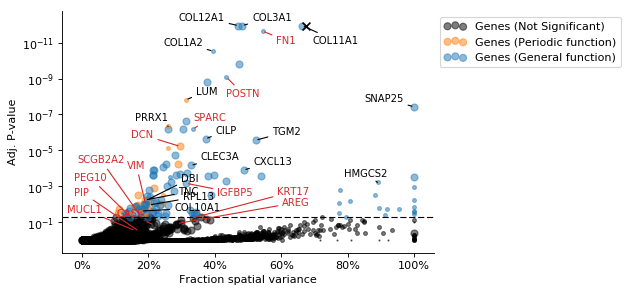

In [59]:
plt.figure(figsize=(6, 4), dpi=80)

SpatialDE.plot.FSV_sig(results, ms_results)


# Annotate Stahl genes
tmp = results.query('g in @stahl_genes')

x_offsets = {}
x_offsets = {'FN1': -0.1,
             'SCGB2A2': 0.05,
             'MUCL1': 0.1,
             'VIM': 0.00,
             'PIP': 0.15,
             'PEG10': 0.07,
             'KRT17':-0.35,
             'AREG': -0.4,
             'SPARC': -0.1,
             'DCN': 0.08,
             'IGFBP5': -0.2,
             'POSTN': -0.1}
y_offsets = {'MUCL1': 1e1,
             'FN1': 2e-1,
             'PEG10': 1e2,
             'VIM': 1e2,
             'SCGB2A2': 1e3,
             'AREG': 1e1,
             'KRT17': 2e1,
             'PIP': 1e2,
             'IGFBP5': 2e-1,
             'POSTN': 8e-2}
for i, r in tmp.iterrows():
    xy = ( r['FSV'], r['qval'])
    xyt = (xy[0] - x_offsets.get(r['g'], 0.03),
           xy[1] / y_offsets.get(r['g'], 3),)
    plt.annotate(r['g'], xy, xyt, color='tab:red', horizontalalignment='right',
                 arrowprops={'arrowstyle': '-', 'color': 'tab:red'}, size=9)
    

# Annotate top genes
x_offsets = {'COL3A1': 0.03,
             'COL12A1': -0.18,
             'COL1A2': -0.15,
             'TGM2': 0.05,
             'COL10A1':0.1,
             'RPL13': 0.1,
             'TNC': 0.1,
             'DBI': 0.1,
             'SNAP25': -0.15,
             'HMGCS2': -0.1,
             'PRRX1': -0.1}
y_offsets = {'COL3A1': 2,
             'COL11A1': 1e-1,
             'CLEC3A': 2,
             'COL10A1': 1,
             'DBI': 1e1}
tmp = results.query('g in @top_per_ls.g')
for i, r in tmp.iterrows():
    xy = ( r['FSV'], r['qval'])
    xyt = (xy[0] + x_offsets.get(r['g'], .03),
           xy[1] / y_offsets.get(r['g'], 2),)
    plt.annotate(r['g'], xy, xyt, color='k', arrowprops={'arrowstyle': '-'}, size=9)

    

plt.savefig('fsv_pval_BC.pdf', bbox_inches='tight');

In [52]:
ms_results.model.value_counts()

SE     94
PER    22
Name: model, dtype: int64

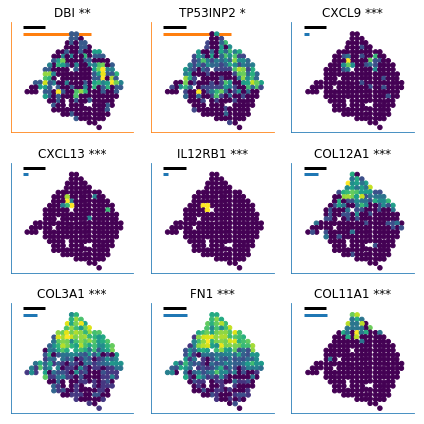

In [53]:
figsize(6, 6)
N = 3
N_rows = 3
gene_sel = ["CXCL13", "CXCL9", "DBI", "COL3A1", "TP53INP2", "COL11A1", "FN1", "COL12A1", "IL12RB1"]
select_genes = ms_results.query('g in @gene_sel')
for i, idx in enumerate(select_genes.index):
    r = select_genes.loc[idx]
    ax = plt.subplot(N_rows, N, i + 1)

    plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=20);

    s = ' *'
    if r['qval'] < 0.01:
        s = ' **'

    if r['qval'] < 0.001:
        s = ' ***'

    plt.title(r['g'] + s)

    plt.xticks([])
    plt.yticks([])
    plt.hlines(-3.5, 7, 12, lw=3)
    if r['l'] + 7 < 28:
        plt.hlines(-5, 7, 7 + r['l'], lw=3, color=model_colors[r['model']], zorder=0)

    else:
        plt.hlines(-5, 7, 25.5, lw=2, color=model_colors[r['model']], zorder=0)
        plt.plot([25, 26], [-6, -4], lw=1, color=model_colors[r['model']])
        plt.plot([26, 27], [-6, -4], lw=1, color=model_colors[r['model']])
        plt.hlines(-5, 26.5, 31, lw=2, color=model_colors[r['model']])
        
    for spine in ax.spines.values():
        spine.set_edgecolor(model_colors[r['model']])

    plt.axis('equal')


plt.tight_layout()
plt.savefig('BC_select_genes.pdf')

In [54]:
select_genes

,BIC,FSV,LLR,M,g,l,max_delta,max_ll,max_mu_hat,max_s2_t_hat,model,n,s2_FSV,s2_logdelta,time,pval,qval,max_ll_null
2,620.291386,0.127569,NaN,4,DBI,15.223976,8.147719,-299.102771,-6.227526,4.367374,PER,250,0.001159,0.085123,0.000805,2.346467e-05,5.485187e-03,-318.800398
3,636.359113,0.172646,NaN,4,TP53INP2,15.223976,5.709324,-307.136635,-8.336188,11.043711,PER,250,0.005083,0.240677,0.000874,1.435860e-04,2.121937e-02,-323.005804
44,430.881327,0.433192,23.091364,4,CXCL9,1.087806,1.279875,-204.397742,-2.651375,1.106132,SE,250,0.000373,0.007181,0.000718,1.544830e-06,5.092789e-04,-227.489106
48,190.419249,0.487063,26.578791,4,CXCL13,1.087806,1.030126,-84.166703,-1.707101,0.479013,SE,250,0.000412,0.007724,0.000669,2.530060e-07,1.230533e-04,-110.745493
49,-230.943314,0.538366,24.531208,4,IL12RB1,1.087806,0.838747,126.514579,-1.397142,0.298391,SE,250,0.000568,0.010731,0.000848,7.311595e-07,2.685862e-04,101.983371
75,603.308737,0.471183,70.927793,4,COL12A1,3.125663,0.936785,-290.611447,-3.932797,0.980559,SE,250,0.001290,0.024291,0.000642,4.440892e-16,1.141931e-12,-361.539240
76,715.554402,0.481935,70.584913,4,COL3A1,3.125663,0.897263,-346.734279,-7.043813,2.330728,SE,250,0.001396,0.026198,0.000628,4.440892e-16,1.141931e-12,-417.319192
113,712.087366,0.543718,64.775814,4,FN1,5.298311,0.530862,-345.000761,-7.995903,2.534525,SE,250,0.003509,0.066529,0.000726,8.881784e-16,2.283862e-12,-409.776575
115,280.987102,0.663190,92.096299,4,COL11A1,5.298311,0.321270,-129.450629,-1.248962,0.452960,SE,250,0.001212,0.027156,0.000956,4.440892e-16,1.141931e-12,-221.546928


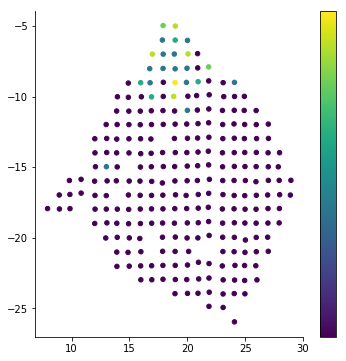

In [55]:
plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=20);
plt.colorbar(ticks=[]);
plt.savefig('plot_with_cbar.pdf');